In [5]:
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import pickle
from sklearn.datasets import fetch_openml
import gzip

<h1>These cells below use 8 * 8 pixel digits and K nearest neighbors algorithm for number recognition.</h1>

In [6]:
# This cell use 8 * 8 pixel digits for number recognition.
# You can treat it as a toy example.
# We use KNN method and take k = 5(by default).

X_digits, y_digits = datasets.load_digits(return_X_y=True)
X_digits = X_digits / X_digits.max()
n_samples = len(X_digits)
divide = int(.9 * n_samples)

X_train = X_digits[:divide]
y_train = y_digits[:divide]
X_test = X_digits[divide:]
y_test = y_digits[divide:]

knn = KNeighborsClassifier()

In [7]:
# here, we do k-folder validation, take k = 5
scores = cross_val_score(knn, X_digits, y_digits, cv=5, scoring='accuracy')

# print all 5 times scores
print(f'Score of each cross validation: {scores}')

# do the average about these five score to get more accuracy score.
print(f'Mean of score of cross validation: {scores.mean()}')

Score of each cross validation: [0.94722222 0.95555556 0.96657382 0.98050139 0.9637883 ]
Mean of score of cross validation: 0.9627282575054161


The highest score and 0.9690880250735772 and the corresponding k is 3 


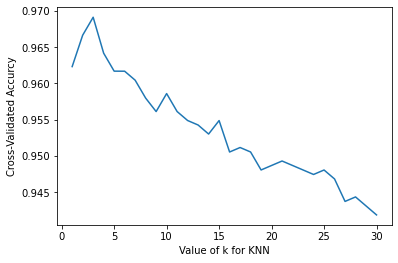

In [8]:
# we could choose different neighbors to see which k is the best K.
# choose k between 1 to 30.

k_scores = [0] * 30
k_range = range(1, 31)

# compute each k in models, use the 5-fold cross validation score as the score of each test
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    k_scores[k - 1] = scores.mean()

max_score = max(k_scores)
best_k = k_scores.index(max_score) + 1
print(f"The highest score and {max_score} and the corresponding k is {best_k} ")
    
# plot score against k.
plt.plot(k_range, k_scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Cross-Validated Accurcy')
plt.show()

KNN score: 0.9666666666666667


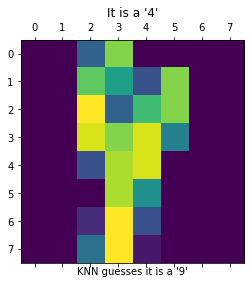

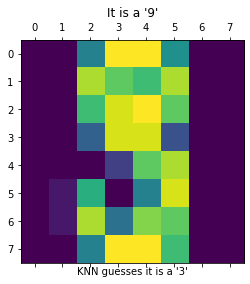

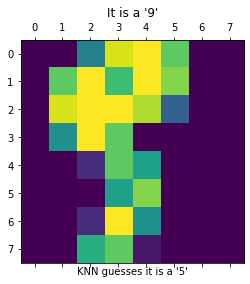

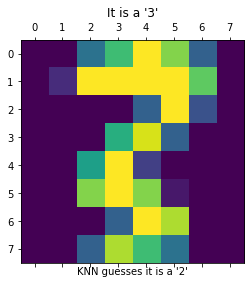

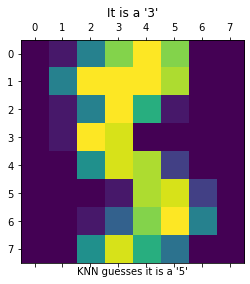

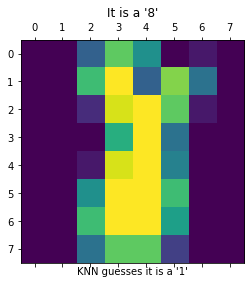

In [9]:
# finally, we decide to train the data using k = 3 (3 nearest neighbors).
knn = KNeighborsClassifier(n_neighbors=3)
knnmodel = knn.fit(X_train, y_train)

# its important to use binary mode
with gzip.open('mnist_train_file', 'wb') as train_data:
    pickle.dump(knnmodel, train_data)
# source, destination

with gzip.open('mnist_train_file', 'rb') as lm:
    loaded_model = pickle.load(lm)

    predict = loaded_model.predict(X_test)
    # the % of correct guess
    print(f'KNN score: {loaded_model.score(X_test, y_test)}')

    # show knn wrong guesses
    for i in range((y_test.shape)[0]):
        if predict[i] != y_test[i]:
            plt.matshow(X_test[i].reshape(8, 8))
            plt.title(f"It is a '{y_test[i]}'")
            plt.xlabel(f"KNN guesses it is a '{predict[i]}'")

<h1>Don't mix the training data with testing data!</h1>
<p>The cell below is a wrong example which uses training data for testing.</p>

In [10]:
# What if we use the whole dat set for training?
# probability increases but it's useless and it just mermorize data!
predict = loaded_model.predict(X_digits)
print(f'KNN score: {loaded_model.score(X_digits, y_digits)}')

KNN score: 0.9905397885364496


<h1>These cells below use the famous dataset MNIST dataset</h1>

In [11]:
X, y = fetch_openml('mnist_784', return_X_y=True)
X = X / X.max()
n_samples = len(X)
divide = int(.9 * n_samples)

X_train = X[:divide]
y_train = y[:divide]
X_test = X[divide:]
y_test = y[divide:]

The highest score and 0.9692222222222222 and the corresponding k is 3 


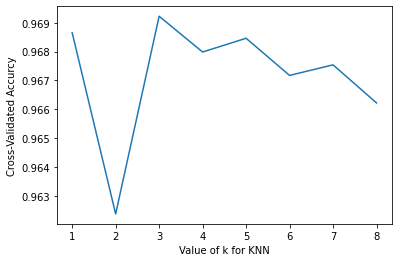

In [12]:
# we could choose different neighbors to see which k is the best K.
# choose k between 1 to 8.

k_scores = [0] * 8
k_range = range(1, 9)

# compute each k in models, use the 5-fold cross validation score as the score of each test
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    k_scores[k - 1] = scores.mean()

max_score = max(k_scores)
best_k = k_scores.index(max_score) + 1
print(f"The highest score and {max_score} and the corresponding k is {best_k} ")
    
# plot score against k.
plt.plot(k_range, k_scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Cross-Validated Accurcy')
plt.show()

KNN score: 0.9774285714285714


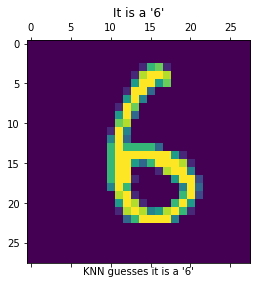

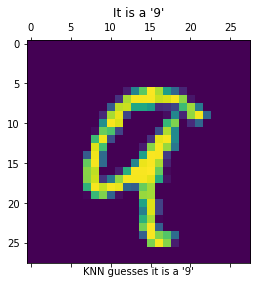

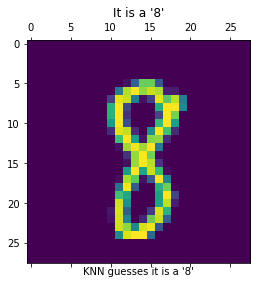

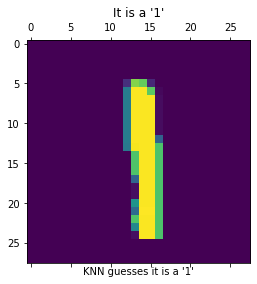

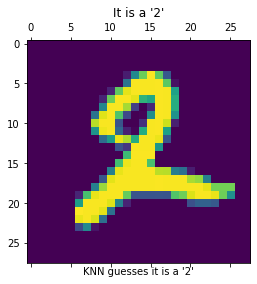

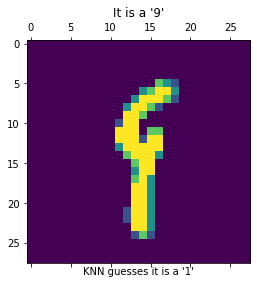

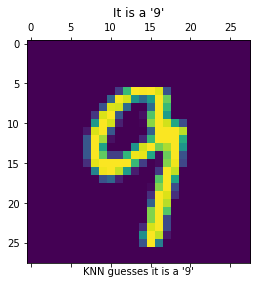

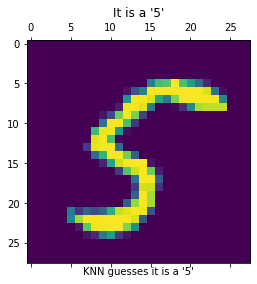

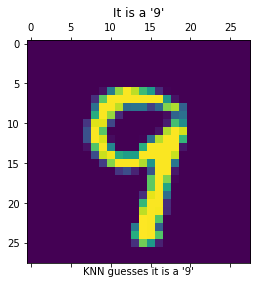

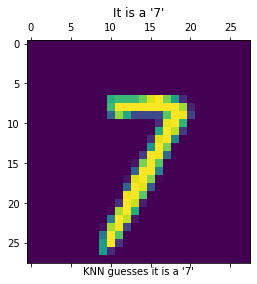

In [13]:
# finally we choose k = 3 (3 nearest neighbors) to train the model.
knn = KNeighborsClassifier(n_neighbors=3)
knnmodel = knn.fit(X_train, y_train)

# its important to use binary mode
with gzip.open('mnist_train_file', 'wb') as train_data:
    pickle.dump(knnmodel, train_data) # source, destination

with gzip.open('mnist_train_file', 'rb') as lm:
    loaded_model = pickle.load(lm)

    predict = loaded_model.predict(X_test)
    # the % of correct guess
    print(f'KNN score: {loaded_model.score(X_test, y_test)}')


    for i in range(10):
        plt.matshow(X_test[i].reshape(28, 28))
        plt.title(f"It is a '{y_test[i]}'")
        plt.xlabel(f"KNN guesses it is a '{predict[i]}'")